In [3]:
 import pandas as pd
 import numpy as np
 import seaborn as sbs
 import matplotlib.pyplot as plt


In [11]:
 df=pd.read_csv('/content/student-mat (1).csv')

In [25]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [27]:
df.duplicated().sum()

0

In [14]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [16]:
df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [18]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
dfs=dfs.replace('no', 0)
dfs=dfs.replace('yes',1)
dfs.head()


,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [21]:
dfs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   schoolsup   395 non-null    int64
 1   famsup      395 non-null    int64
 2   paid        395 non-null    int64
 3   activities  395 non-null    int64
 4   nursery     395 non-null    int64
 5   higher      395 non-null    int64
 6   internet    395 non-null    int64
 7   romantic    395 non-null    int64
dtypes: int64(8)
memory usage: 24.8 KB


In [24]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)

In [23]:
n.shape

(395, 2)

In [28]:
 m=np.array(dfs[['romantic','internet']])
 m=m.reshape(-1,2)
 m.shape


(395, 2)

In [29]:
from scipy.spatial import distance
dist_matrix = distance.cdist(n,m)


In [30]:
dist_matrix.shape

(395, 395)

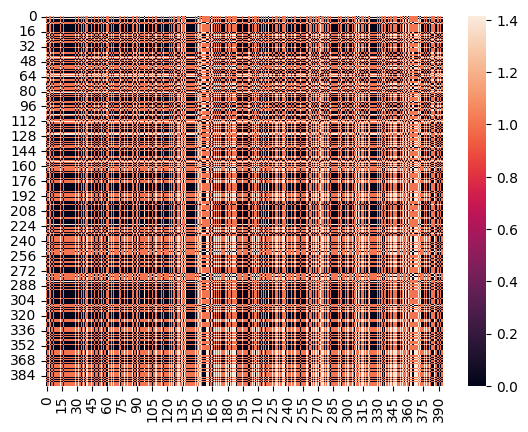

In [31]:
sbs.heatmap(dist_matrix)
plt.show()


In [32]:
import numpy as np
from sklearn.metrics import pairwise_distances


In [34]:
dissimilarity_matrix = pairwise_distances(dfs, metric='euclidean')
print(dissimilarity_matrix)


[[0.         2.         1.41421356 ... 1.41421356 1.73205081 1.41421356]
 [2.         0.         2.         ... 1.41421356 1.         1.41421356]
 [1.41421356 2.         0.         ... 2.         1.73205081 1.41421356]
 ...
 [1.41421356 1.41421356 2.         ... 0.         1.         1.41421356]
 [1.73205081 1.         1.73205081 ... 1.         0.         1.        ]
 [1.41421356 1.41421356 1.41421356 ... 1.41421356 1.         0.        ]]
